In [32]:
import plotly.graph_objects as go
import pandas as pd

In [26]:
df = pd.read_csv("MTA_Daily_Ridership_Data__Beginning_2020_20241106.csv")

In [27]:
df.head()

,Date,Subways: Total Estimated Ridership,Subways: % of Comparable Pre-Pandemic Day,Buses: Total Estimated Ridership,Buses: % of Comparable Pre-Pandemic Day,LIRR: Total Estimated Ridership,LIRR: % of Comparable Pre-Pandemic Day,Metro-North: Total Estimated Ridership,Metro-North: % of Comparable Pre-Pandemic Day,Access-A-Ride: Total Scheduled Trips,Access-A-Ride: % of Comparable Pre-Pandemic Day,Bridges and Tunnels: Total Traffic,Bridges and Tunnels: % of Comparable Pre-Pandemic Day,Staten Island Railway: Total Estimated Ridership,Staten Island Railway: % of Comparable Pre-Pandemic Day
0,03/01/2020,2212965,97,984908,99,86790,100,55825,59,19922,113,786960,98,1636,52
1,03/02/2020,5329915,96,2209066,99,321569,103,180701,66,30338,102,874619,95,17140,107
2,03/03/2020,5481103,98,2228608,99,319727,102,190648,69,32767,110,882175,96,17453,109
3,03/04/2020,5498809,99,2177165,97,311662,99,192689,70,34297,115,905558,98,17136,107
4,03/05/2020,5496453,99,2244515,100,307597,98,194386,70,33209,112,929298,101,17203,108


In [30]:
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y")
df["month-end"] = df["Date"] + pd.tseries.offsets.MonthEnd(0)
df["year"] = df["Date"].dt.year
df["month"] = df["Date"].dt.month

In [31]:
df.head()

,Date,Subways: Total Estimated Ridership,Subways: % of Comparable Pre-Pandemic Day,Buses: Total Estimated Ridership,Buses: % of Comparable Pre-Pandemic Day,LIRR: Total Estimated Ridership,LIRR: % of Comparable Pre-Pandemic Day,Metro-North: Total Estimated Ridership,Metro-North: % of Comparable Pre-Pandemic Day,Access-A-Ride: Total Scheduled Trips,Access-A-Ride: % of Comparable Pre-Pandemic Day,Bridges and Tunnels: Total Traffic,Bridges and Tunnels: % of Comparable Pre-Pandemic Day,Staten Island Railway: Total Estimated Ridership,Staten Island Railway: % of Comparable Pre-Pandemic Day,month-end,year,month
0,2020-03-01,2212965,97,984908,99,86790,100,55825,59,19922,113,786960,98,1636,52,2020-03-31,2020,3
1,2020-03-02,5329915,96,2209066,99,321569,103,180701,66,30338,102,874619,95,17140,107,2020-03-31,2020,3
2,2020-03-03,5481103,98,2228608,99,319727,102,190648,69,32767,110,882175,96,17453,109,2020-03-31,2020,3
3,2020-03-04,5498809,99,2177165,97,311662,99,192689,70,34297,115,905558,98,17136,107,2020-03-31,2020,3
4,2020-03-05,5496453,99,2244515,100,307597,98,194386,70,33209,112,929298,101,17203,108,2020-03-31,2020,3


In [34]:
df_month = df.groupby("month-end", as_index=False)["Subways: Total Estimated Ridership"].sum()
df_month.head()

,month-end,Subways: Total Estimated Ridership
0,2020-03-31,73625223
1,2020-04-30,11730474
2,2020-05-31,15275851
3,2020-06-30,23928304
4,2020-07-31,32508961


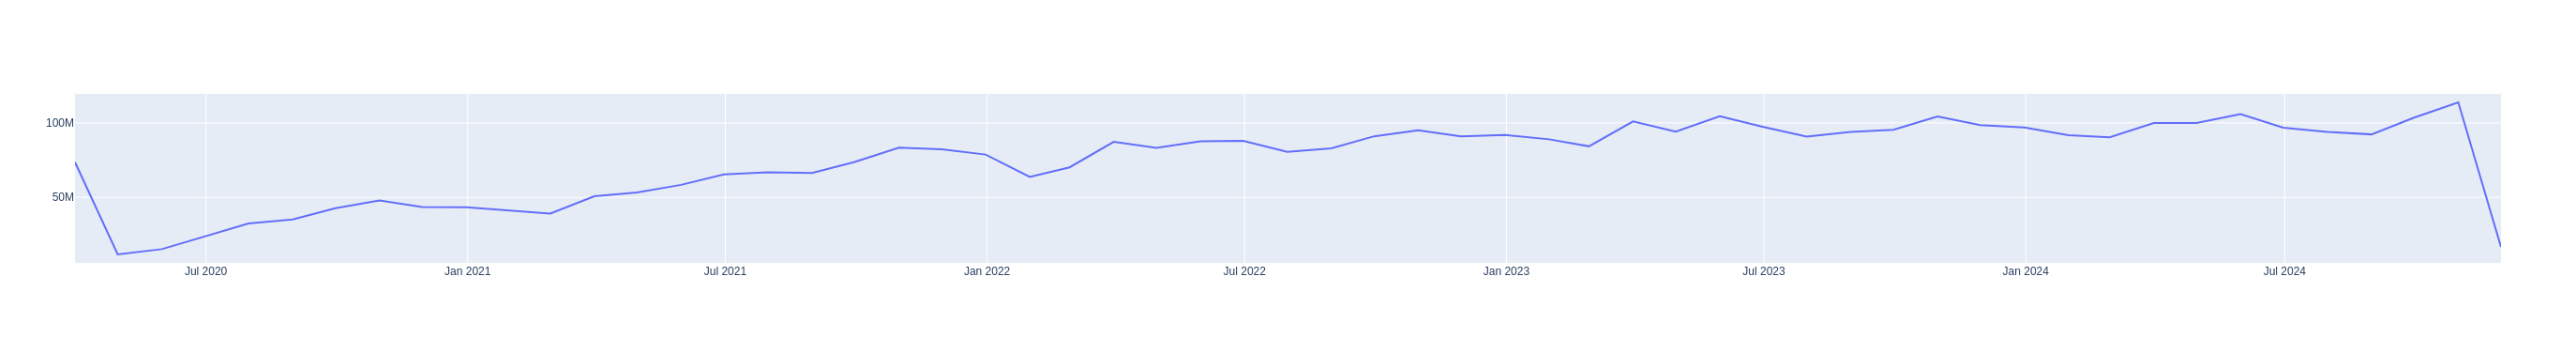

In [36]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_month["month-end"], y=df_month["Subways: Total Estimated Ridership"]))